# 正则化
先用岭回归, 如果计算量太大(岭回归不能将某些theta项归零), 就用弹性网(能同时结合两个的优点)
## 岭回归

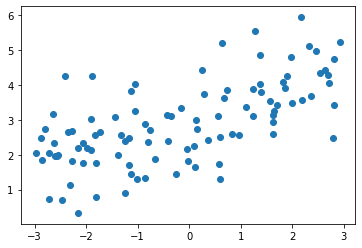

In [49]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5*x + 3 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)), # 第一个为名字
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())
    ])

from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401087009438

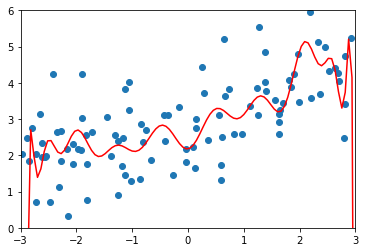

In [52]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color="r")
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

## 开始使用

In [53]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()), 
        ("ridge_reg", Ridge(alpha=alpha))
    ])

1.3233492754155471


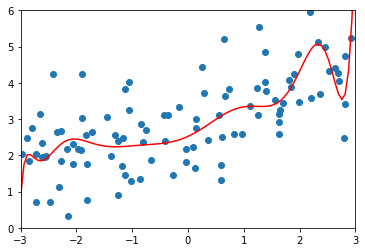

In [54]:
ridge_reg1 = RidgeRegression(20, 0.0001)
ridge_reg1.fit(X_train, y_train)

y1_predict = ridge_reg1.predict(X_test)
print(mean_squared_error(y1_predict, y_test))
plot_model(ridge_reg1)

1.3196456113086197


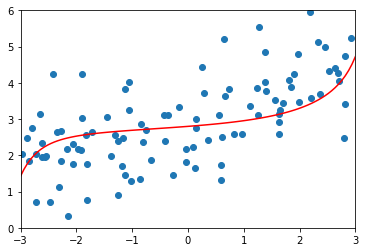

In [55]:
ridge_reg2 = RidgeRegression(20, 100)
ridge_reg2.fit(X_train, y_train)

y2_predict = ridge_reg2.predict(X_test)
print(mean_squared_error(y2_predict, y_test))
plot_model(ridge_reg2)

## LASSO 回归

1.1496080843259964


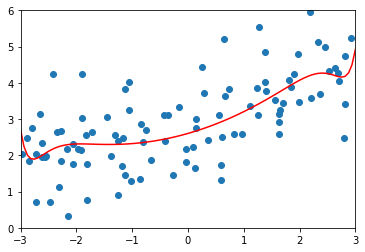

In [57]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()), 
        ("lasso_reg", Lasso(alpha=alpha))
    ])

lasso_reg1 = LassoRegression(20, 0.01) # lasso的alpha最好比岭回归的alpha大一些
lasso_reg1.fit(X_train, y_train)

y1_predict = lasso_reg1.predict(X_test)
print(mean_squared_error(y1_predict, y_test))
plot_model(lasso_reg1)

1.1213911351818648


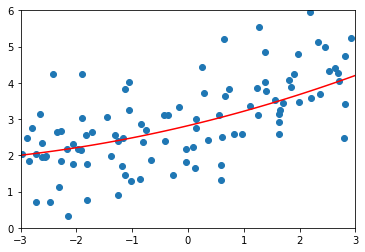

In [60]:
lasso_reg2 = LassoRegression(20, 0.1) # alpha最好比alpha大一些, 因为
lasso_reg2.fit(X_train, y_train)

y2_predict = lasso_reg2.predict(X_test)
print(mean_squared_error(y2_predict, y_test))
plot_model(lasso_reg2)